In [7]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans 
import seaborn as sns
import scipy.io as sio
import matplotlib.pyplot as plt
import random
# from sklearn import metrics
# from sklearn.grid_search import GridSearchCV
# from sklearn.linear_model import LogisticRegression

# from time import time

# 不显示警告
import warnings
warnings.filterwarnings("ignore")

In [71]:
# 获取数据
mat = sio.loadmat('../data_wu/ex7data2.mat')
print(type(mat))
print(mat.keys())
data = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
data.head()

<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'X'])


,X1,X2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


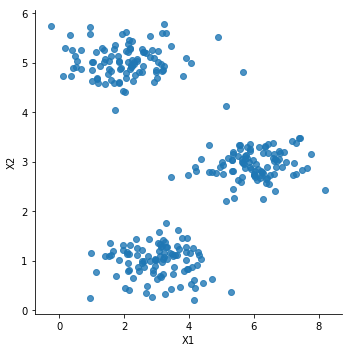

In [7]:
# 数据可视化
sns.lmplot('X1', 'X2', data=data, fit_reg=False)
plt.show()

In [8]:
# 使用自带函数
km = KMeans(n_clusters = 3)
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
label = km.labels_ #获得每个值属于哪个类
label1 = km.predict(data) # 效果一样

# label == label1 # 两者一样

<class 'pandas.core.frame.DataFrame'>


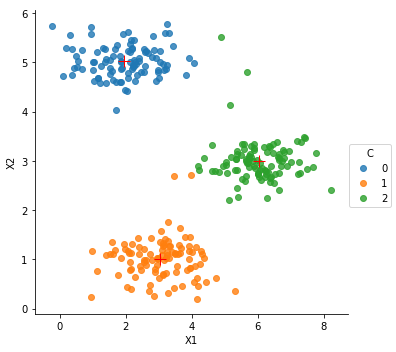

In [29]:
# 聚类可视化
def combine_data_C(data, C):
    data_with_c = data.copy()
    data_with_c['C'] = C
    return data_with_c

data_label = combine_data_C(data, label)
print(type(data_label))
sns.lmplot('X1', 'X2', hue = 'C', data = data_label, fit_reg = False)


# 获取聚类中心
centroids =  km.cluster_centers_ 
#将聚类中心绘制在图中
mark = ['r+', 'r+', 'r+']
# mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']
k = 3
for i in range(k):             
    plt.plot(centroids[i][0], centroids[i][1], mark[i], markersize = 12)
plt.show()

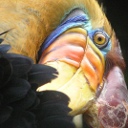

In [31]:
# *****************************************对图像进行压缩***************************************
# 获取图像
from IPython.display import Image
Image(filename='../data_wu/bird_small.png')

In [34]:
image_data = sio.loadmat('../data_wu/bird_small.mat')
image_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'A'])

In [36]:
image = image_data.get('A')
image.shape

(128, 128, 3)

In [46]:
# 转成float类型,否则绘图时绘制不出
image = image / 255.
X = np.reshape(image, (image.shape[0] * image.shape[1], image.shape[2]))
X.shape

(16384, 3)

In [47]:
im_km = KMeans(n_clusters = 16)
im_km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [48]:
centroids = im_km.cluster_centers_
print(centroids.shape)

C = im_km.predict(X)
print(C.shape)

(16, 3)
(16384,)


In [49]:
compressed_pic = centroids[C].reshape((image.shape[0],image.shape[1],3))

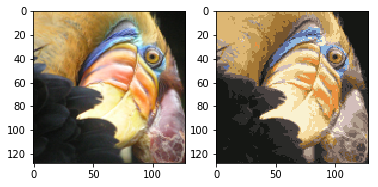

In [50]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image)
ax[1].imshow(compressed_pic)
plt.show()

(8, 3)
(16384,)


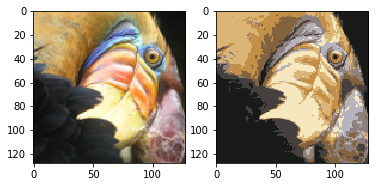

In [51]:
# 聚成8类，也就是8中颜色
im_km = KMeans(n_clusters = 8)
im_km.fit(X)

centroids = im_km.cluster_centers_
print(centroids.shape)

C = im_km.predict(X)
print(C.shape)

compressed_pic = centroids[C].reshape((image.shape[0],image.shape[1],3))

fig, ax = plt.subplots(1, 2)
ax[0].imshow(image)
ax[1].imshow(compressed_pic)
plt.show()

(32, 3)
(16384,)


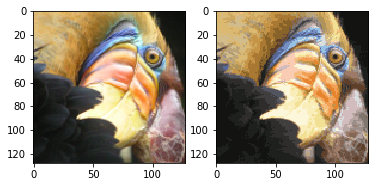

In [52]:
im_km = KMeans(n_clusters = 32)
im_km.fit(X)

centroids = im_km.cluster_centers_
print(centroids.shape)

C = im_km.predict(X)
print(C.shape)

compressed_pic = centroids[C].reshape((image.shape[0],image.shape[1],3))

fig, ax = plt.subplots(1, 2)
ax[0].imshow(image)
ax[1].imshow(compressed_pic)
plt.show()

(2, 3)
(16384,)


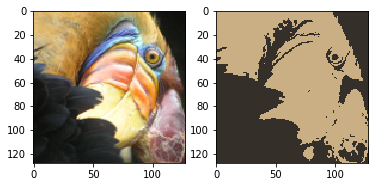

In [53]:
# 聚成2类，可以看到，只有两种颜色
im_km = KMeans(n_clusters = 2)
im_km.fit(X)

centroids = im_km.cluster_centers_
print(centroids.shape)

C = im_km.predict(X)
print(C.shape)

compressed_pic = centroids[C].reshape((image.shape[0],image.shape[1],3))

fig, ax = plt.subplots(1, 2)
ax[0].imshow(image)
ax[1].imshow(compressed_pic)
plt.show()

In [6]:
# ************************* PCA ******************************
data = sio.loadmat('../data_wu/ex7data1.mat')
print(type(data))
data.keys()

<class 'dict'>


dict_keys(['__header__', '__version__', '__globals__', 'X'])

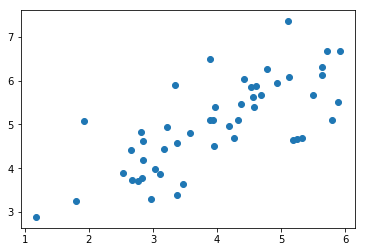

In [7]:
X = data['X']
# sns.lmplot(X[:, 0], X[:, 1], data = X)
# X = pd.DataFrame(X, columns = ('X1', 'X2'))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [12]:
# def pca(X):
#     # 归一化
#     X = (X - X.mean()) / X.std()
#     X = np.matrix(X)
#     sig = (X.T * X) / X.shape[0]
    
#     U, S, V = np.linalg.svd(sig)
#     return U, S, V

def pca(X):
    # normalize the features
    X = (X - X.mean()) / X.std()
    
    # compute the covariance matrix
    X = np.matrix(X)
    cov = (X.T @ X) / X.shape[0]
    
    # perform SVD
    U, S, V = np.linalg.svd(cov)
    
    return U, S, V

In [9]:
print(X.shape)
U, S, V = pca(X)
U, S, V

(50, 2)


(matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]),
 array([1.43584536, 0.56415464]),
 matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]))

In [16]:
def project_data(X, U, k):
    m, n = X.shape
    if k > n:
        raise ValueError('k should be lower dimension of n')
    return X @ U[:, :k]

# 重建压缩，返回成压缩前的向量
def recover_data(Z, U, k):
    m, n = Z.shape
    
    if n >= U.shape[0]:
        raise ValueError('Z dimension is >= U, you should recover from lower dimension to higher')
    return Z @ U[:, :k].T


In [12]:
Z = project_data(X, U, 1)
Z[:10]

matrix([[-4.74689738],
        [-7.15889408],
        [-4.79563345],
        [-4.45754509],
        [-4.80263579],
        [-7.04081342],
        [-4.97025076],
        [-8.75934561],
        [-6.2232703 ],
        [-7.04497331]])

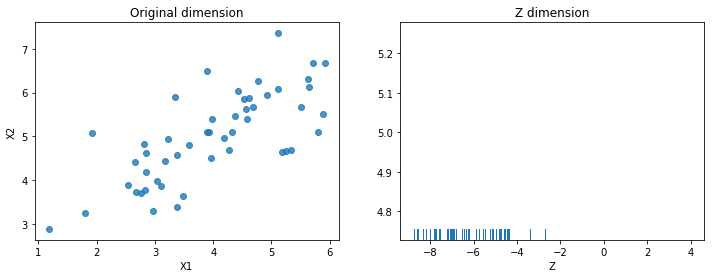

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

sns.regplot('X1', 'X2', 
           data=pd.DataFrame(X, columns=['X1', 'X2']),
           fit_reg=False,
           ax=ax1)
ax1.set_title('Original dimension')

# rugplot绘制1D图像
sns.rugplot(Z, ax=ax2)
ax2.set_xlabel('Z')
ax2.set_title('Z dimension')
plt.show()

In [2]:
# ******************************* PCA on faces****************************
# 加载数据

mat = sio.loadmat('../data_wu/ex7faces.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [6]:
X = mat['X']
print(X.shape)
print(type(X))

(5000, 1024)
<class 'numpy.ndarray'>


1725


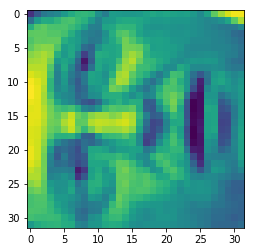

In [11]:
rd = random.randint(1, X.shape[0])
print(rd)
test = np.reshape(X[3, :], (32, 32))
plt.imshow(test)
plt.show()

In [14]:
U, S, V = pca(X)
Z = project_data(X, U, 100)

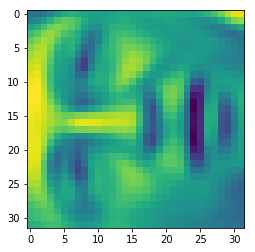

In [18]:
X_recovered = recover_data(Z, U, 100)
test1 = np.reshape(X_recovered[3, :], (32, 32))
plt.imshow(test1)
plt.show()

In [19]:
a = np.arange(1, 10)

In [20]:
a

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [21]:
a.reshape((2, 3)).T.reshape(9)

ValueError: cannot reshape array of size 9 into shape (2,3)

In [22]:
a = np.arange(1, 7)
a

array([1, 2, 3, 4, 5, 6])

In [23]:
a.reshape((2, 3)).T.reshape(6)

array([1, 4, 2, 5, 3, 6])

In [24]:
a.reshape((2, 3))

array([[1, 2, 3],
       [4, 5, 6]])

In [25]:
a.reshape(2, 3)

array([[1, 2, 3],
       [4, 5, 6]])

In [26]:
a.reshape((2, 3)).T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [27]:
def plot_n_image(X, n):
    """ plot first n images
    n has to be a square number
    """
    pic_size = int(np.sqrt(X.shape[1]))
    grid_size = int(np.sqrt(n))

    first_n_images = X[:n, :]

    fig, ax_array = plt.subplots(nrows=grid_size, ncols=grid_size,
                                    sharey=True, sharex=True, figsize=(8, 8))

    for r in range(grid_size):
        for c in range(grid_size):
            ax_array[r, c].imshow(first_n_images[grid_size * r + c].reshape((pic_size, pic_size)))
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))


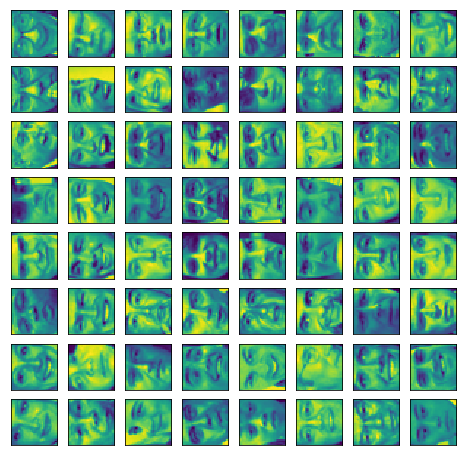

In [28]:
plot_n_image(X, n = 64)